# <center>Homework 2<center> 
##### <center>ECE5554 - Virginia Tech | Author: Rebecca DeSipio | Due Date: July 20th, 2022 <center>
------------------------------------------------------

In [1]:
# import libraries
import numpy as np
import cv2

import matplotlib.pyplot as plt

Template shape:  (128, 128)


<Figure size 432x288 with 0 Axes>

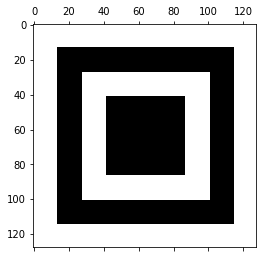

In [2]:
## ----------------------------------------------------------------------------------
##                                  QUESTION 1
## Create a template for use in template matching.
## This should be an 8-bit grayscale image of just the marker (128x128 in size)
## ----------------------------------------------------------------------------------
# Draw template using "overlaid" rectangles
T = np.ones((128,128), np.float32) * 255 # start with baseline image set to desired template size
white = (255, 255, 255) 
black = (0,0,0)
start = int(128/9) # starting point white inner rectangle

cv2.rectangle(T, (start, start), (128-start, 128-start), black, -1) # -1 fills in the rectangle with the set color
cv2.rectangle(T, (start*2, start*2), (int(128 - start*2),int(128 - start*2)),white, -1)
cv2.rectangle(T, (start*3, start*3), (int(128 - start*3),int(128 - start*3)),black, -1)

## Uncomment to display the template
# cv2.imshow("Template", T)
# cv2.waitKey()
plt.figure()
plt.matshow(T.astype(np.uint8), cmap='gray')

print("Template shape: ", np.shape(T))

In [3]:
# compute template matching - https://www.geeksforgeeks.org/template-matching-using-opencv-in-python/
# define a function for perform the process
def computeTemplateMatching(img):
    # start by importing QR_A image and get this baseline working
    filename = img
    qrImg = cv2.imread(filename).astype(np.float32)
    qrImg_gray = ((qrImg[:,:,2] + qrImg[:,:,1] + qrImg[:,:,0]) / 3).astype(np.float32)

    # Perform template matching
    tempMatch = cv2.matchTemplate(qrImg_gray, T, cv2.TM_CCOEFF)
    
    # store the original shape of the resulting template matching
    tempShape = np.shape(tempMatch)

    min = np.min(tempMatch)
    tempMatch = np.abs(min) + tempMatch
    max = np.max(tempMatch)
    tempMatch = ((tempMatch / max) * 255).astype(np.uint8)
    saveResult = tempMatch.copy()

    for i in range(tempShape[0]):
        for j in range(tempShape[1]):
            if tempMatch[i,j] < (255/2):
                tempMatch[i,j] = 0
            if tempMatch[i,j] > (210):
                tempMatch[i,j] = 255

    print("Filename: ", filename)

    # need to find the LOCAL maxima
    maxLoc = np.where(tempMatch == 255)
    maxY = np.unique(maxLoc[0])
    maxX = np.unique(maxLoc[1])
    
    consecutiveY = True
    consecutiveX = True
    counter = 0
    localMaxY = []
    localMaxX = []
    tempY = 0
    tempX = 0
    totalCount = 0

    while consecutiveY:
        try:
            if maxY[counter] == maxY[counter+1]-1: # if they match continue counting
                # store the locations in a variable to get the "center location"
                tempY = tempY + maxY[counter]
                totalCount = totalCount + 1; counter = counter + 1
            else: # if no longer consecutive
                # obtain the "center" value and reset the temp variables
                if totalCount != 0:
                    localMaxY.append(tempY / totalCount)

                tempY = 0; totalCount = 0
                counter = counter + 1
        except:
            localMaxY.append(tempY / totalCount)
            consecutiveY=False # should enter on out of bounds error
            counter = 0; tempY = 0; tempX = 0; totalCount = 0

    while consecutiveX:
        try:
            if maxX[counter] == maxX[counter+1]-1: # if they match continue counting
                # store the locations in a variable to get the "center location"
                tempX = tempX + maxX[counter]
                totalCount = totalCount + 1; counter = counter + 1
            else: # if no longer consecutive
                # obtain the "center" value and reset the temp variables
                if totalCount != 0:
                    localMaxX.append(tempX / totalCount)

                tempX = 0; totalCount = 0
                counter = counter + 1
        except:
            localMaxX.append(tempX / totalCount)
            consecutiveX=False # should enter on out of bounds error
            counter = 0; tempY = 0; tempX = 0; totalCount = 0
    
    # print('localMaxX: ', localMaxX)
    # print('localMaxY: ', localMaxY)

    # find the final points
    finalX = []
    finalY = []

    finalX.append(int(np.round(localMaxX[0]))); finalX.append(int(np.round(localMaxX[-1])))
    finalY.append(int(np.round(localMaxY[0]))); finalY.append(int(np.round(localMaxY[-1])))

    # print('MaxX: ', finalX)
    # print('MaxY: ', finalY)

    markerLocations = np.array([(int(finalX[0]), int(finalY[0])), (int(finalX[0]), int(finalY[1])), (int(finalX[1]), int(finalY[0]))])

    color = (255,0,0)
    cv2.rectangle(qrImg, (int(finalX[0]), int(finalY[0])), (int(finalX[0]+128), int(finalY[0])+128), color, 5)
    cv2.rectangle(qrImg, (int(finalX[0]), int(finalY[1])), (int(finalX[0]+128), int(finalY[1])+128), color, 5)
    cv2.rectangle(qrImg, (int(finalX[1]), int(finalY[0])), (int(finalX[1]+128), int(finalY[0])+128), color, 5)

    # print out the coordinates to the console
    print("Marker location coordinates (top left points):")
    print(markerLocations, " \n")



    return saveResult, qrImg, markerLocations

In [4]:
# compute the template matching result for all five images (A-E)
qrA_res, qrA_img, qrA_markerLocations = computeTemplateMatching('QR_A.png')
qrB_res, qrB_img, qrB_markerLocations = computeTemplateMatching('QR_B.png')
qrC_res, qrC_img, qrC_markerLocations = computeTemplateMatching('QR_C.png')
qrD_res, qrD_img, qrD_markerLocations = computeTemplateMatching('QR_D.png')
qrE_res, qrE_img, qrE_markerLocations = computeTemplateMatching('QR_E.png')

Filename:  QR_A.png
Marker location coordinates (top left points):
[[ 35 294]
 [ 35 526]
 [260 294]]  

Filename:  QR_B.png
Marker location coordinates (top left points):
[[ 491  668]
 [ 491 1074]
 [ 884  668]]  

Filename:  QR_C.png
Marker location coordinates (top left points):
[[ 49  50]
 [ 49 421]
 [288  50]]  

Filename:  QR_D.png
Marker location coordinates (top left points):
[[ 174  173]
 [ 174 1220]
 [1276  173]]  

Filename:  QR_E.png
Marker location coordinates (top left points):
[[310 292]
 [310 550]
 [570 292]]  



In [5]:
# Define affine transforms to map the three marker locations in the image to points (50,50), (250,50), (50,250)
def performAffineTransforms(img, qr_markerLocations):
    filename = img
    qrImg = cv2.imread(filename).astype(np.float32)
    mapToLocations = np.array([(50,50), (50, 250), (250,50)])

    # QR_A
    qr_markerLocations[1][1] = qr_markerLocations[1][1] + 128 # need to use the bottom left corner
    qr_markerLocations[2][0] = qr_markerLocations[2][0] + 128 # need to use the outer right corner

    qr_affineTransform = cv2.getAffineTransform(qr_markerLocations.astype(np.float32), mapToLocations.astype(np.float32))
    qr_warped = cv2.warpAffine(qrImg, qr_affineTransform, (300, 300))
    
    return qr_warped

In [6]:
# obtain warped images
qrA_warped = performAffineTransforms('QR_A.png', qrA_markerLocations)
qrB_warped = performAffineTransforms('QR_B.png', qrB_markerLocations)
qrC_warped = performAffineTransforms('QR_C.png', qrC_markerLocations)
qrD_warped = performAffineTransforms('QR_D.png', qrD_markerLocations)
qrE_warped = performAffineTransforms('QR_E.png', qrE_markerLocations)

In [7]:
# save results from match template
cv2.imwrite('qrA_MT.png', qrA_res)
cv2.imwrite('qrB_MT.png', qrB_res)
cv2.imwrite('qrC_MT.png', qrC_res)
cv2.imwrite('qrD_MT.png', qrD_res)
cv2.imwrite('qrE_MT.png', qrE_res)

# save results with found marker locations
cv2.imwrite('qrA_result.png', qrA_img)
cv2.imwrite('qrB_result.png', qrB_img)
cv2.imwrite('qrC_result.png', qrC_img)
cv2.imwrite('qrD_result.png', qrD_img)
cv2.imwrite('qrE_result.png', qrE_img)

# save warped images
cv2.imwrite('qrA_warped.png', qrA_warped)
cv2.imwrite('qrB_warped.png', qrB_warped)
cv2.imwrite('qrC_warped.png', qrC_warped)
cv2.imwrite('qrD_warped.png', qrD_warped)
cv2.imwrite('qrE_warped.png', qrE_warped)


True

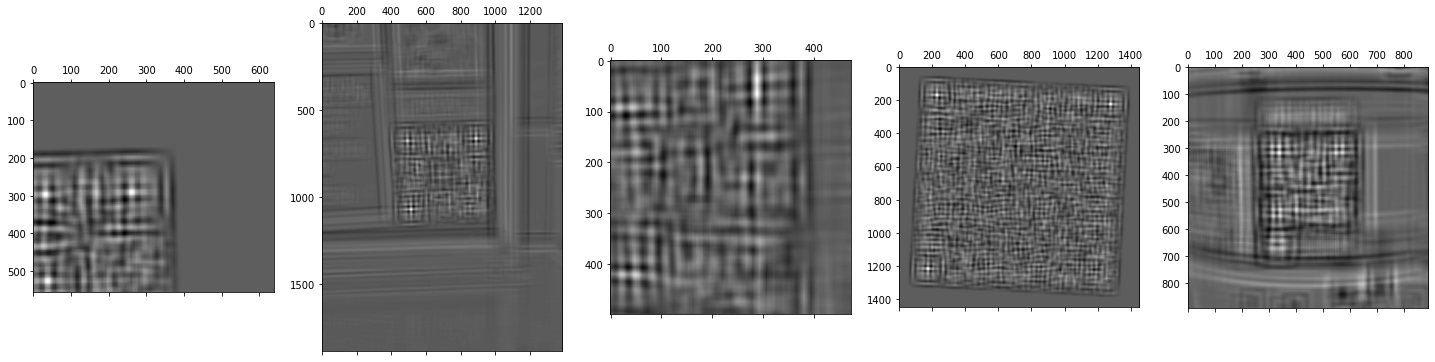

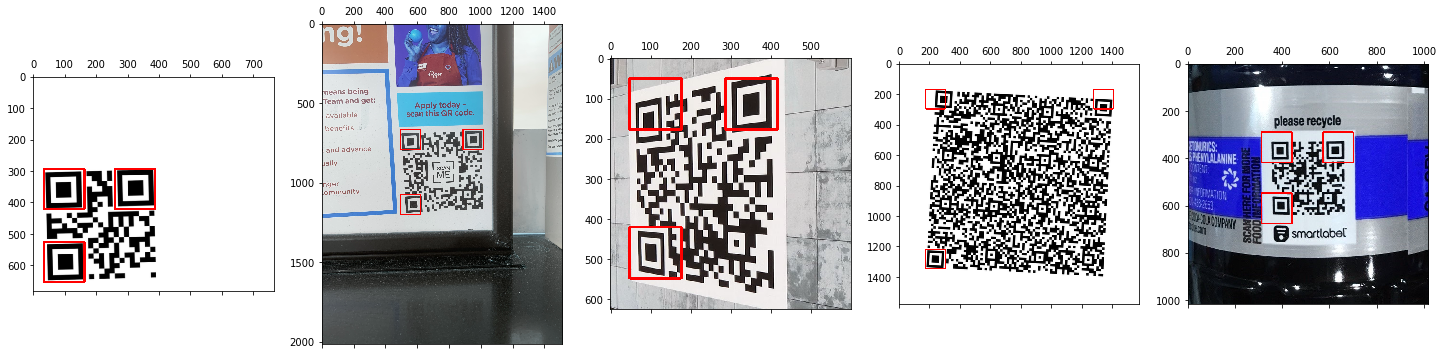

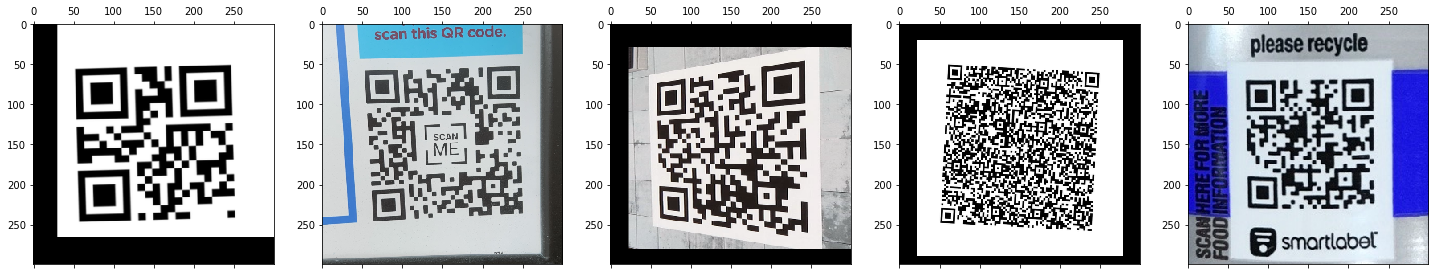

In [7]:
# plot the results from template matching
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(25,15))
ax1.matshow(qrA_res , cmap='gray')
ax2.matshow(qrB_res, cmap='gray')
ax3.matshow(qrC_res, cmap='gray')
ax4.matshow(qrD_res, cmap='gray')
ax5.matshow(qrE_res, cmap='gray')

fig2, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(25,15))
ax1.matshow(qrA_img.astype(np.uint8))
ax2.matshow(qrB_img.astype(np.uint8))
ax3.matshow(qrC_img.astype(np.uint8))
ax4.matshow(qrD_img.astype(np.uint8))
ax5.matshow(qrE_img.astype(np.uint8))

fig3, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(25,15))
ax1.matshow(qrA_warped.astype(np.uint8))
ax2.matshow(qrB_warped.astype(np.uint8))
ax3.matshow(qrC_warped.astype(np.uint8))
ax4.matshow(qrD_warped.astype(np.uint8))
ax5.matshow(qrE_warped.astype(np.uint8))

In [ ]:
filename = 'QR_D.png'
qrImg = cv2.imread(filename).astype(np.float32)
qrImg_gray = ((qrImg[:,:,2] + qrImg[:,:,1] + qrImg[:,:,0]) / 3).astype(np.float32)

# Perform template matching
tempMatch = cv2.matchTemplate(qrImg_gray, T, cv2.TM_CCOEFF)

# store the original shape of the resulting template matching
tempShape = np.shape(tempMatch)

min = np.min(tempMatch)
tempMatch = np.abs(min) + tempMatch
max = np.max(tempMatch)
tempMatch = ((tempMatch / max) * 255).astype(np.uint8)

w = T.shape[0]
h = T.shape[1]

# Find coordinates of matched locations (based on a threshold)
matches = np.where(tempMatch >= 200)

for pt in zip(*matches[::-1]):
    cv2.rectangle(qrImg, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)

fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(qrImg.astype(np.uint8))

In [ ]:
# finding local maxima (doesn't work yet)
maximums = np.where(tempMatch == 255)
    max0 = np.unique(maximums[0])
    max1 = np.unique(maximums[1])

    findingLocalMax = True
    localMaxima0 = []
    localMaxima1 = []
    localElements0 = 0
    localElements1 = 0
    totalElements  = 0
    counter        = 0

    while findingLocalMax == True:
        
        if counter == len(max1)-1:
            findingLocalMax = False
            localMaxima0.append(np.floor(localElements0 / totalElements))
            localMaxima1.append(np.floor(localElements1 / totalElements))
        elif max1[counter] == (max1[counter + 1]-1):
            totalElements = totalElements + 1
            localElements0 = localElements0 + max0[counter]
            localElements1 = localElements1 + max1[counter]
            counter       = counter + 1
        else:
            localMaxima0.append(np.floor(localElements0 / totalElements))
            localMaxima1.append(np.floor(localElements1 / totalElements))
            localElements0 = 0
            localElements1 = 0
            totalElements = 0
            counter       = counter + 1            

    color = (255,0,0)
    cv2.rectangle(qrImg, (int(localMaxima1[0]), int(localMaxima0[0])), (int(localMaxima1[0]+128), int(localMaxima0[0])+128), color, 10)
    cv2.rectangle(qrImg, (int(localMaxima1[0]), int(localMaxima0[1])), (int(localMaxima1[0]+128), int(localMaxima0[1])+128), color, 10)
    cv2.rectangle(qrImg, (int(localMaxima1[1]), int(localMaxima0[0])), (int(localMaxima1[1]+128), int(localMaxima0[0])+128), color, 10)